<a href="https://colab.research.google.com/github/yuki2023-kenkyu/Numerical_Computation_Seminar/blob/main/answers/%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E6%95%B0%E5%80%A4%E8%A7%A3%E6%B3%95_1/answer%5B1%5D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 解析解の導出
___

ポイント：半角の定理や2倍角の定理などを用いて式変形する．

$$
\begin{eqnarray}
  \frac{dy}{dx} &=& -2\sin^2{x}-\sin{x}+1\\
  &=& -2\;\frac{1-\cos{2x}}{2}-\sin x+1\\
  &=& \cos2x-\sin x\\
\end{eqnarray}
$$


よって，両辺を $x$ で積分すると


$$
\begin{eqnarray}
  \int dy &=& \int \cos 2x \;dx-\int\sin x \;dx\\
  y &=& \frac{1}{2}\;\sin 2x + \cos x +C \\
  &=& \sin x \cos x + \cos x +C \\
  &=& (1+\sin x)\cos x +C
\end{eqnarray}
$$


ここで，初期条件 $x_0=0$ のとき $y_0=1$ より，$C=0$


\begin{eqnarray}
  \therefore y = (1+\sin x)\cos x \\
\end{eqnarray}

# 演習問題 [1] (2) の解答
___

<Figure size 432x288 with 0 Axes>

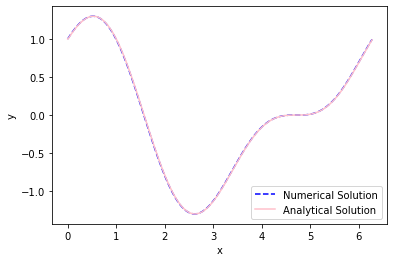

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# １階微分方程式
def f(x, y):
    return -(2*np.sin(x)-1)*(np.sin(x)+1)
# 解析解
def g(x1, y1):
    return (1+np.sin(x1))*np.cos(x1)

# 初期条件
x0 = 0
y0 = 1
xmax = 2*np.pi

# 刻み幅の設定
m = 1024
h = (xmax - x0) /m

# 変域の設定
xpoints = np.arange(x0, xmax, h)
x1points = np.arange(x0, xmax, h)
# 計算結果を保存する配列の用意
ypoints = []
y1points = []

# 初期値の代入
x=x1=x0
y=y1=y0
# 数値積分
for x in xpoints:
    # 配列に要素を追加
    ypoints.append(y)
    # ルンゲ・クッタ法のアルゴリズム
    k1 = h * f(x, y)
    k2 = h * f(x+h/2, y+k1/2)
    k3 = h * f(x+h/2, y+k2/2)
    k4 = h * f(x+h, y+k3)
    y += (k1+2*k2+2*k3+k4)/6

# 解析解
for x1 in x1points:
    y1points.append(y1)
    y1 = g(x1, y1)

# グラフ用の各種設定
fig = plt.figure()
# グラフの背景色の設定
fig, ax = plt.subplots(facecolor = 'white')

ax.plot(xpoints, ypoints, '--', label = 'Numerical Solution', color = 'Blue')
ax.plot(x1points, y1points, '-', label = 'Analytical Solution', color = 'Pink')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')